# Efficiency Plots for 2017:

Check efficiency plots w.r.t the reference (noringer)

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...

Applying ATLAS style settings...

Applying ATLAS style settings...


## 1) Read all files:

In [2]:
output_path = 'output/efficiencies'
mkdir_p(output_path)
version = 'v9'
ref = 'v8'

In [3]:
eff_data17_Zee_ref = restore_efficiencies( '../%s/output/emulation/data17_Zee_efficiency_%s.root'%(ref,ref))

In [4]:
eff_data17_Zee_ref.triggers

['HLT_e140_lhloose_nod0_ringer_v8',
 'HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v8_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v8_L1EM24VHI']

In [5]:
eff_data17_Zee_test = restore_efficiencies( 'output/emulation/data17_Zee_efficiency_%s.root'%version)

In [6]:
eff_data17_Zee_test.triggers

['HLT_e140_lhloose_nod0_ringer_v9',
 'HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v9_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v9_L1EM24VHI']

In [7]:
eff_data17_JF17_ref = restore_efficiencies( '../%s/output/emulation/data17_JF17_efficiency_%s.root'%(ref,ref))

In [8]:
eff_data17_JF17_test = restore_efficiencies( 'output/emulation/data17_JF17_efficiency_%s.root'%version)

In [9]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

In [10]:
legends = ['with Ringer (%s)'%version, 'with Ringer (%s)'%ref]

## 1) HLT_e17:

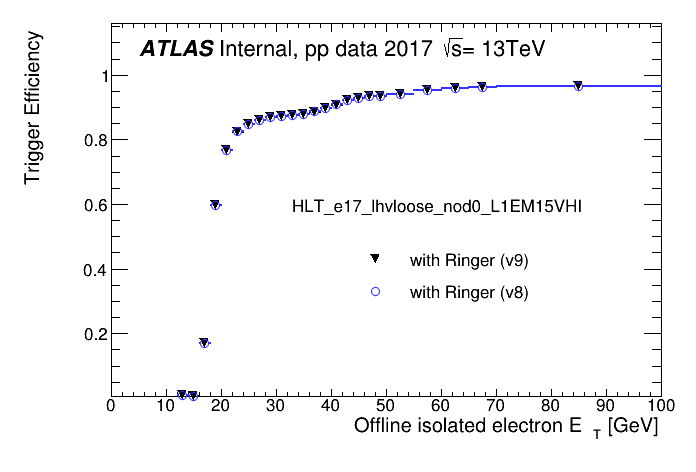

In [11]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_%s_2017_HLT_et.pdf'%version)

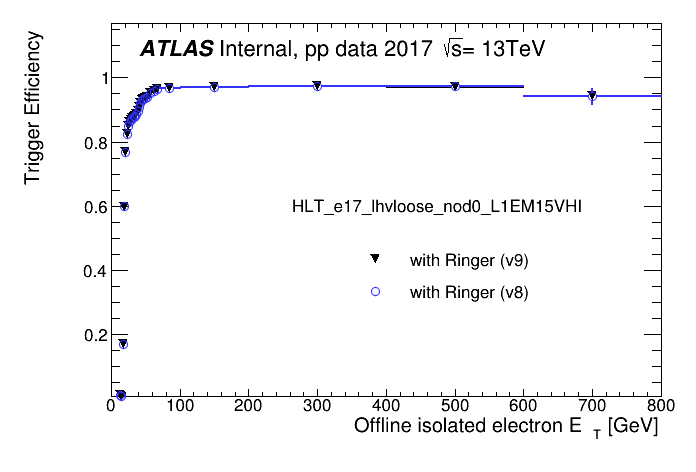

In [12]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_%s_2017_HLT_highet.pdf'%version)

## 2) HLT_e28:

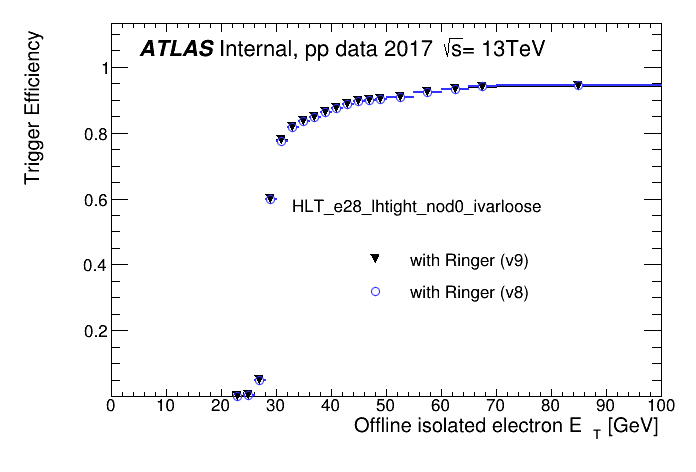

In [13]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_et.pdf'%version)

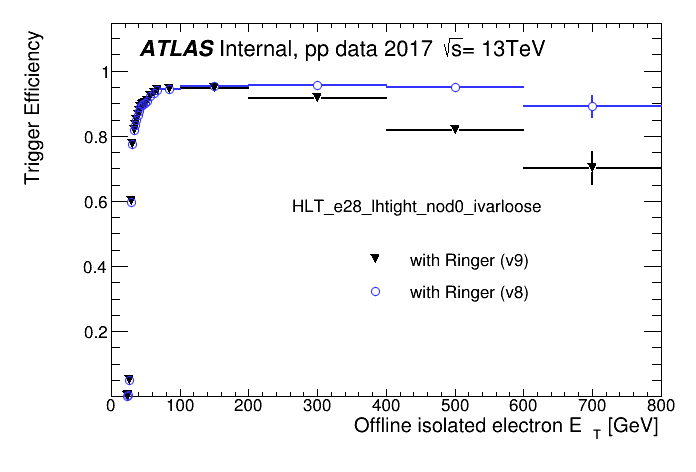

In [14]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_highet.pdf'%version)

## 3) HLT_e60:

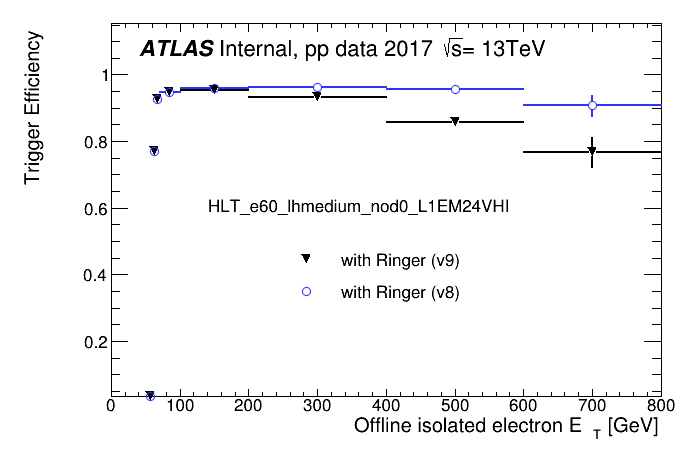

In [15]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,legends)
rpl.add_text( 0.3, 0.55, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_%s_2017_HLT_highet.pdf'%version)

## 4) HLT_e140:

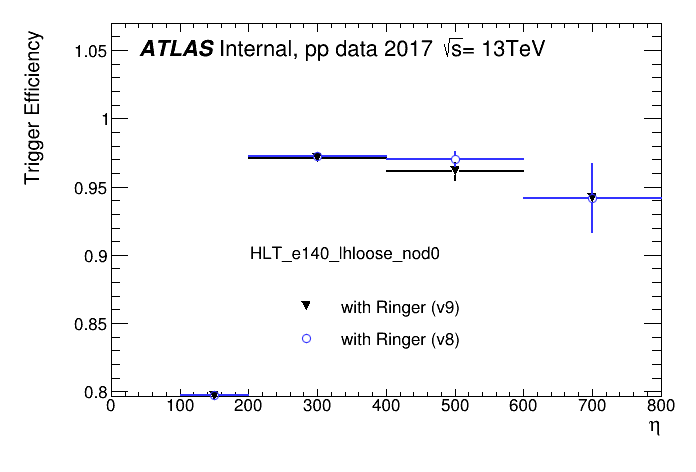

In [16]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e140_lhloose_nod0_ringer_%s'%version, 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e140_lhloose_nod0_ringer_%s'%ref, 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.25,legends )
rpl.add_text( 0.36, 0.45, 'HLT_e140_lhloose_nod0', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e140_ringer_%s_2017_HLT_highet.pdf'%version)